In [1]:
# Import libraries
import pandas as pd
import numpy as np

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
file_path = 'data/NSDUH_2021_Tab.txt'

data = pd.read_csv(file_path, sep='\t')

In [2]:
dataframe_path = 'data/dataframe.csv'

df = pd.read_csv(dataframe_path)

In [3]:
df.head()

,CIGEVER,MJEVER,ALCEVER,COCEVER,CRKEVER,HEREVER,LSD,METHAMEVR,IRIMPREMEM,ADDPREV,IRSUIPLANYR,ASDSREL2,IRAMDEYR,IRDSTCHR12
0,1,1,1,0,0,0,0,0,2,2,0.0,NaN,0.0,99
1,1,0,1,0,0,0,0,0,99,2,0.0,NaN,0.0,99
2,0,0,1,0,0,0,0,0,1,2,0.0,NaN,0.0,4
3,1,1,1,0,0,0,0,0,2,1,0.0,NaN,0.0,99
4,0,0,0,0,0,0,0,0,99,2,0.0,NaN,0.0,99


In [ ]:
# 'IRIMPREMEM', # DIFFICULTY REMEMBERING ONE MO IN PST 12 MOS - IMP REV (495) --> BINARY!
# 'ADDPREV', # SEVERAL DAYS OR LNGR WHEN FELT SAD/EMPTY/DPRSD (506) --> BINARY!
# 'IRSUIPLANYR', # ADULT MADE PLANS TO KILL SELF IN PST YR - IMP REV (499)
# 'ASDSREL2', # ADULT: DEP FEELINGS ROLE IMPAIRMENT - CLOSE RELATIONSHIPS (520)
# 'IRAMDEYR', # ADULT: PAST YEAR MAJOR DEPRESSIVE EPISODE (MDE) - IMP REV
# 'IRDSTCHR12' # HOW OFTEN FELT COULDN'T BE CHEERED UP WRST MONTH - IMP REV

In [ ]:
### Thought: Taking all of the target variables above and making an aggregate target variable. This will be the target variable for the model.

### You could take an average of the 6 target variables and scale them to a 0-1 scale. This would be the target variable for the model.

In [ ]:
# IRIMPREMEM 
1 = No difficulty ................................................................................................................. 17389 29.96
2 = Mild difficulty............................................................................................................... 12505 21.55
3 = Moderate difficulty ....................................................................................................... 5745 9.90
4 = Severe difficulty............................................................................................................ 1839 3.17
99 = LEGITIMATE SKIP................................................................................................... 20556 35.42

In [4]:
df.IRIMPREMEM.value_counts()

99    20397
1     17342
2     12461
3      5708
4      1828
Name: IRIMPREMEM, dtype: int64

In [26]:
# Drop all 99s from the field above and run model with field as target (Difficulty Remembering)

# Drop all irrelevant targets
memory_df = df.drop(['ADDPREV', 'IRSUIPLANYR', 'ASDSREL2',
       'IRAMDEYR', 'IRDSTCHR12'], axis=1)

# Drop all 99s from the target field
memory_df = memory_df[memory_df['IRIMPREMEM'] != 99]

# Inspect
memory_df.IRIMPREMEM.value_counts()


1    17342
2    12461
3     5708
4     1828
Name: IRIMPREMEM, dtype: int64

In [35]:
# Import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
# Import other stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Instantiate the classifier
rfc = RandomForestClassifier(n_estimators=150, random_state=42)

# Define X and y
X = memory_df.drop(columns=['IRIMPREMEM'])
y = memory_df['IRIMPREMEM']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
rfc.fit(X_train, y_train)

# Make predictions
y_pred_prob = rfc.predict_proba(X_test)

In [36]:
# Import ROCAUC
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score of y_test and y_pred_prob
roc_auc_score(y_test, y_pred_prob, multi_class='ovr') # 'ovr' stands for 'one-vs-rest' and it is sensitive to class imbalance

0.5709892846695729

In [38]:
# Insect balanced classifier
y_pred = rfc.predict(X_test)

# Return a ckassification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.92      0.63      4305
           2       0.37      0.11      0.17      3124
           3       0.28      0.01      0.02      1446
           4       0.00      0.00      0.00       460

    accuracy                           0.46      9335
   macro avg       0.28      0.26      0.21      9335
weighted avg       0.39      0.46      0.35      9335



### Make this feature importance code into function later

In [39]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = rfc.feature_importances_
features = X_train.columns

# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})

# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)

# View dataframe
feature_importance_df

,feature,feature_importance
1,MJEVER,0.369779
7,METHAMEVR,0.130593
6,LSD,0.108513
3,COCEVER,0.104935
5,HEREVER,0.090615
0,CIGEVER,0.083960
2,ALCEVER,0.059896
4,CRKEVER,0.051709


In [5]:
df.ADDPREV.value_counts()

2     29452
1     15988
99    10609
98     1519
97      105
94       57
85        6
Name: ADDPREV, dtype: int64

In [ ]:
1 = Yes................................................................................................................................ 16069 27.69
2 = No................................................................................................................................. 29524 50.87
85 = BAD DATA Logically assigned ................................................................................. 7 0.01
94 = DON'T KNOW........................................................................................................... 59 0.10
97 = REFUSED .................................................................................................................. 108 0.19
98 = BLANK (NO ANSWER) ........................................................................................... 1524 2.63
99 = LEGITIMATE SKIP................................................................................................... 10743 18.51

In [41]:
# Clean data
addprev_df = df.drop(['IRIMPREMEM', 'IRSUIPLANYR', 'ASDSREL2',
       'IRAMDEYR', 'IRDSTCHR12'], axis=1)

# Keep only 1s and 2s
addprev_df = addprev_df[(addprev_df['ADDPREV'] == 1) | (addprev_df['ADDPREV'] == 2)]

# Change all 2s to 0s
addprev_df['ADDPREV'] = addprev_df['ADDPREV'].replace(2, 0)

# Inspect
addprev_df.head()

,CIGEVER,MJEVER,ALCEVER,COCEVER,CRKEVER,HEREVER,LSD,METHAMEVR,ADDPREV
0,1,1,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0


In [43]:
addprev_df.ADDPREV.value_counts()

0    29452
1    15988
Name: ADDPREV, dtype: int64

### Note this one is binary classification

In [44]:
# Deploy RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# Define X and y
X = addprev_df.drop('ADDPREV', axis=1)
y = addprev_df['ADDPREV']

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
rfc.fit(X_train, y_train)

# Predict
y_pred_proba = rfc.predict_proba(X_test)[:,1]

In [45]:
# Calculate ROC AUC
ROCAUC = roc_auc_score(y_test, y_pred_proba)

# Print ROC AUC
ROCAUC

0.6183256941804595

In [48]:
# Make predications
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79      5944
           1       0.57      0.06      0.10      3144

    accuracy                           0.66      9088
   macro avg       0.62      0.52      0.45      9088
weighted avg       0.63      0.66      0.55      9088



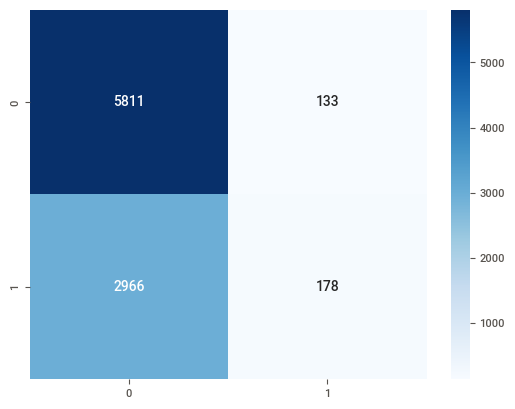

In [49]:
# Return confusion matrix using seaborn heatmap

import seaborn as sns
import matplotlib.pyplot as plt

ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show(ax1)

In [46]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = rfc.feature_importances_
features = X_train.columns

# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})

# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)

# View dataframe
feature_importance_df

,feature,feature_importance
1,MJEVER,0.315434
6,LSD,0.246588
2,ALCEVER,0.150941
3,COCEVER,0.147502
7,METHAMEVR,0.075211
0,CIGEVER,0.038690
5,HEREVER,0.022125
4,CRKEVER,0.003509


In [11]:
df.columns

Index(['CIGEVER', 'MJEVER', 'ALCEVER', 'COCEVER', 'CRKEVER', 'HEREVER', 'LSD',
       'METHAMEVR', 'IRIMPREMEM', 'ADDPREV', 'IRSUIPLANYR', 'ASDSREL2',
       'IRAMDEYR', 'IRDSTCHR12'],
      dtype='object')

In [6]:
# ADULT MADE PLANS TO KILL SELF IN PST YR - IMP REV (499)
df.IRSUIPLANYR.value_counts()

0.0    46168
1.0      959
Name: IRSUIPLANYR, dtype: int64

In [18]:
# Import sweetviz
import sweetviz as sv
np.bool = np.bool_

# Analyze the dataset with IRSUIPLANYR as the target variable and all EVER variables as features

# Subset the dataframe to include the first 7 columns and IRSUIPLANYR
sui_df = df.iloc[:, 0:8]
sui_df['IRSUIPLANYR'] = df['IRSUIPLANYR']

# Drop all null values
sui_df = sui_df.dropna()

# Set IRSUIPLANYR's data type to int
sui_df['IRSUIPLANYR'] = sui_df['IRSUIPLANYR'].astype(int)

# Inspect dataframe
sui_df.head()

,CIGEVER,MJEVER,ALCEVER,COCEVER,CRKEVER,HEREVER,LSD,METHAMEVR,IRSUIPLANYR
0,1,1,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [20]:
# Inspect sui_df info()
sui_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47127 entries, 0 to 57735
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CIGEVER      47127 non-null  int64
 1   MJEVER       47127 non-null  int64
 2   ALCEVER      47127 non-null  int64
 3   COCEVER      47127 non-null  int64
 4   CRKEVER      47127 non-null  int64
 5   HEREVER      47127 non-null  int64
 6   LSD          47127 non-null  int64
 7   METHAMEVR    47127 non-null  int64
 8   IRSUIPLANYR  47127 non-null  int32
dtypes: int32(1), int64(8)
memory usage: 3.4 MB


In [19]:
# Run report
sui_report = sv.analyze(sui_df, target_feat='IRSUIPLANYR')

# Save report as HTML file
sui_report.show_html('sui_report.html')

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\e.a.wright\anac

Report sui_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
# Check value_counts() again before building model
df.IRSUIPLANYR.value_counts()

0.0    46168
1.0      959
Name: IRSUIPLANYR, dtype: int64

### There is a serious class imbalance in the dataset that will need to be addressed using resampling.

In [24]:
# Import scikit-learn LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Instantiate the classifier
clf = LogisticRegression()

# Define X and y
X = sui_df.drop(['IRSUIPLANYR'], axis=1)
y = sui_df['IRSUIPLANYR']

# Break data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

In [25]:
# Print classification report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18449
           1       0.00      0.00      0.00       402

    accuracy                           0.98     18851
   macro avg       0.49      0.50      0.49     18851
weighted avg       0.96      0.98      0.97     18851



c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [ ]:
# Rectify the class imbalance with oversampling


In [ ]:
# Return confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show(ax1)

In [8]:
df.ASDSREL2.value_counts()

3.0    1875
4.0    1718
2.0     829
5.0     501
1.0     186
Name: ASDSREL2, dtype: int64

In [9]:
df.IRAMDEYR.value_counts()

0.0    41736
1.0     5391
Name: IRAMDEYR, dtype: int64

In [10]:
df.IRDSTCHR12.value_counts()

99    40436
3      4317
4      3814
5      3631
2      3511
1      2027
Name: IRDSTCHR12, dtype: int64